### Exercise 1 understand the titanic data example

Understand the Titanic clustering example

1. Look at this [Notebook](https://github.com/datsoftlyngby/dat4sem2020spring-python/blob/master/notebooks/10-4-2%20Clustering%20Titanic%20eample.ipynb)
2. Go through the code and make sure you understand everything

### Exercise 2 use meanshift on the iris dataset

1. Load 'iris_data.csv' into a dataframe
2. Get unique labels (Species column)

In [11]:
import pandas as pd
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

data = pd.read_csv("iris_data.csv")
data["Species"] = encoder.fit_transform(data["Species"].astype(str))

data

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


3. Plot with a scatter plot each iris flower sample colored by label (3 different colors)

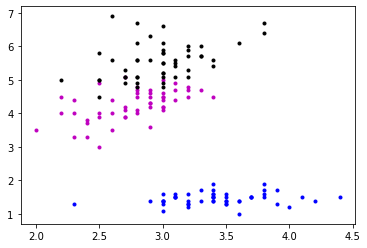

In [112]:
import matplotlib.pyplot as plt

colors=['g.','y.','r.','b.','m.','k.']

for i in range(len(data)):
    plt.plot(data["Sepal width"][i],data["Petal length"][i], colors[data["Species"][i]+3])

4. Use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters 

    (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result

In [113]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

bw = estimate_bandwidth(data, quantile=0.2)
ms = MeanShift(bandwidth = bw)

ms.fit(data)

print("Bandwidth: ", bw)

Bandwidth:  0.9714028141871647


5. Print out labels, cluster centers and number of clusters (as returned from the MeanShift function

In [114]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_
clusters = len(np.unique(labels))

print("Number of unique clusters: ",clusters, "\n")
print("Labels:\n ", labels, "\n")
print("Cluster centers:\n ", cluster_centers)

Number of unique clusters:  3 

Labels:
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

Cluster centers:
  [[4.98510638 3.41914894 1.47021277 0.24255319 0.        ]
 [5.93809524 2.79047619 4.29761905 1.33809524 1.        ]
 [6.37567568 2.95945946 5.36216216 2.04324324 2.        ]]


6. Create a new scatter plot where each flower is colored according to cluster label
7. Add a dot for the cluster centers

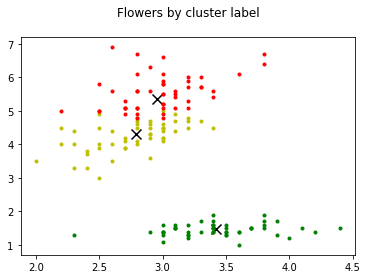

In [115]:
for i in range(len(data)):
    plt.plot(data["Sepal width"][i],data["Petal length"][i], colors[labels[i]])

# Sepal width and petal length is colum 2 and 3 in the dataframe. 
plt.scatter(cluster_centers[:,1], cluster_centers[:,2], marker="x", s=100, color='k')
plt.title("Flowers by cluster label\n")
print()

8. Compare the 2 plots (colored by actual labels vs. colored by cluster label)

Both plots are the same.